In [48]:
import pandas as pd
import collections
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
# word cloud
import numpy as np
from wordcloud import WordCloud

In [49]:
# to do, format this better and focus analysis only on these conferences, update the df in the beginning
venue_map = [('CHI Extended Abstracts', 'CHI'),
 ('CHI', 'CHI'),
 ('CSCW', 'CSCW'),
 ('UbiComp', 'UBI'),
 ('UIST', 'UIST'),
 ('Computer Supported Cooperative Work (CSCW)', 'CSCW'),
 ('UbiComp Adjunct', 'UBI'),
 ('CSCW Companion', 'CSCW'),
 ('CHI Conference Companion', 'CHI'),
 ('UbiComp/ISWC Adjunct', 'UBI'),
 ("CHI EA '04", 'CHI'),
 ('CHI 95 Conference Companion', 'CHI'),
 ('CHI Conference Summary', 'CHI'),
 ("UbiComp '11", 'UBI'),
 ('CHI 2014', 'CHI'),
 ("CHI '92", 'CHI'),
 ("CHI '99", 'CHI'),
 ("CHI '03", 'CHI'),
 ("CSCW '13", 'CSCW'),
 ("CHI '95", 'CHI'),
 ("CHI '89", 'CHI'),
 ("UbiComp '10 Adjunct", 'UBI'),
 ("CHI '90", 'CHI'),
 ("CHI '94", 'CHI'),
 ("CSCW '06", 'CSCW'),
 ("CSCW '10", 'CSCW'),
 ("CHI '83", 'CHI'),
 ("UIST'14 Adjunct", 'UIST'),
 ("CHI '87", 'CHI'),
 ("CHI '86", 'CHI'),
 ("CSCW '96", 'CSCW'),
 ("UIST '13 Adjunct", 'UIST'),
 ("CSCW '00", 'CSCW'),
 ("CSCW '98", 'CSCW'),
 ("UIST '10", 'UIST'),
 ("CHI '88", 'CHI'),
 ("CSCW '02", 'CSCW'),
 ("UIST Adjunct Proceedings '12", 'UIST'),
 ("CHI '85", 'CHI'),
 ("CSCW '94", 'CSCW'),
 ("CSCW '92", 'CSCW'),
 ("UIST '04", 'UIST'),
 ("UIST '11 Adjunct", 'UIST'),
 ("UIST '08", 'UIST'),
 ("UIST '09", 'UIST'),
 ("CHI '82", 'CHI'),
 ("UIST '97", 'UIST'),
 ("CSCW '86", 'CSCW'),
 ("UIST '95", 'UIST'),
 ("UIST '98", 'UIST'),
 ("UIST '94", 'UIST'),
 ("CSCW '88", 'CSCW'),
 ("UIST '01", 'UIST'),
 ("UIST '96", 'UIST'),
 ("UIST '00", 'UIST'),
 ("UIST '93", 'UIST'),
 ("CSCW '90", 'CSCW'),
 ("UIST '99", 'UIST'),
 ("UIST '02", 'UIST'),
 ("UIST '03", 'UIST'),
 ('CHI 2007', 'CHI'),
 ("UIST '91", 'UIST'),
 ("UIST '89", 'UIST'),
 ("UIST '90", 'UIST'),
 ('CHI 2010', 'CHI'),
 ("UIST '92", 'UIST'),
 ('CHI 2008', 'CHI'),
 ('UBICOMP 2015', 'UBI'),
 ('CHI 2011', 'CHI'),
 ('CHI 2009', 'CHI'),
 ('Ubicomp 2009', 'UBI'),
 ('UbiComp 2016', 'UBI'),
 ('UbiComp 2011', 'UBI'),
 ('CHI 1994', 'CHI'),
 ('CHI 2012', 'CHI'),
 ('CHI 2002', 'CHI'),
 ('CHI 2013', 'CHI'),
 ("CHI '81", 'CHI'),
 ('CHI 2017', 'CHI'),
 ('UbiComp 2014', 'UBI'),
 ('CHI 2015', 'CHI'),
 ('CHI 2006', 'CHI'),
 ('UbiComp 2013', 'UBI'),
 ('UbiComp 2008', 'UBI'),
 ('CHI 2003', 'CHI'),
 ('Ubicomp 2010', 'UBI'),
 ('CHI 2001', 'CHI'),
 ('CHI 2018', 'CHI'),
 ('CHI 1995', 'CHI'),
 ("CHI '02", 'CHI'),
 ('CSCW 2017', 'CSCW'),
 ('Computer Supported Cooperative Work and Social Computing', 'CSCW'),
 ('CHI 1997', 'CHI'),
 ('CHI 2016', 'CHI'),
 ('CHI 2005', 'CHI'),
 ('Proc. ACM Hum. Comput. Interact.', 'CSCW'),
 ('Comput. Support. Cooperative Work.', 'CSCW'),
 ('UBICOMP 2012', 'UBI'),
 ('CHI 1998', 'CHI'),
 ('CHI 2004', 'CHI'),
 ('CSCW 2008', 'CSCW'),
 ('CSCW 2016', 'CSCW'),
 ('UIST 2013', 'UIST'),
 ('UIST 2016', 'UIST'),
 ('UIST 2014', 'UIST'),
 ('UIST 2011', 'UIST'),
 ('CHI 1993', 'CHI'),
 ('CHI 2000', 'CHI'),
 ('CSCW 2010', 'CSCW'),
 ('CSCW 2012', 'CSCW'),
 ('CSCW 2014', 'CSCW'),
 ('CSCW 2013', 'CSCW'),
 ('CSCW 2015', 'CSCW'),
 ('Proc. ACM Interact. Mob. Wearable Ubiquitous Technol.', 'UBI'),
 ('UbiComp 2017', 'UBI'),
 ('UIST 2007', 'UIST'),
 ('UIST 2008', 'UIST'),
 ('CHI 1999', 'CHI')]

venue_map_dict = {}
for unit in venue_map:
    venue_map_dict[unit[0]] = unit[1]

In [50]:
# data that joins patent paper citation
df = pd.read_csv('final_all_HCI_info_citation_per_record_081422.tsv',sep=',')

C:\Users\hanch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
df.columns

Index(['mag_id', 'patent', 'paperid', 'externalIds', 'url', 'title_x',
       'abstract_x', 'venue', 'year', 'referenceCount', 'citationCount',
       'influentialCitationCount', 'isOpenAccess', 'fieldsOfStudy',
       's2FieldsOfStudy', 'publicationTypes', 'publicationDate', 'journal',
       'authors', 'Unnamed: 0.1', 'Unnamed: 0', 'reftype', 'confscore',
       'magid', 'uspto', 'wherefound', 'doi', 'pmid', 'diff_month',
       'selfciteconf_avg', 'selfciteconf_avgno0', 'selfciteconf_max',
       'patent_id', 'country', 'date', 'abstract_y', 'title_y', 'kind',
       'num_claims', 'withdrawn', 'inventor_id', 'inventor_name_first',
       'inventor_name_last', 'male_flag', 'attribution_status', 'assignee_id',
       'assignee_name_first', 'assignee_name_last', 'organization',
       'aff_paperid', 'aff_authorids', 'aff_affiliations'],
      dtype='object')

In [52]:
df

,mag_id,patent,paperid,externalIds,url,title_x,abstract_x,venue,year,referenceCount,...,inventor_name_last,male_flag,attribution_status,assignee_id,assignee_name_first,assignee_name_last,organization,aff_paperid,aff_authorids,aff_affiliations
0,9453182,10389475,63fc6df0aa899082e36a504c8a532d5689596df8,"{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...",https://www.semanticscholar.org/paper/63fc6df0...,Preventing Camera Recording by Designing a Cap...,NaN,UbiComp,2005.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.453182e+06,"['1688263250', '2127286128', '2144340954', '62...","['College of Computing and GVU Center, Georgia..."
1,9453182,10531038,63fc6df0aa899082e36a504c8a532d5689596df8,"{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...",https://www.semanticscholar.org/paper/63fc6df0...,Preventing Camera Recording by Designing a Cap...,NaN,UbiComp,2005.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.453182e+06,"['1688263250', '2127286128', '2144340954', '62...","['College of Computing and GVU Center, Georgia..."
2,9453182,10592687,63fc6df0aa899082e36a504c8a532d5689596df8,"{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...",https://www.semanticscholar.org/paper/63fc6df0...,Preventing Camera Recording by Designing a Cap...,NaN,UbiComp,2005.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.453182e+06,"['1688263250', '2127286128', '2144340954', '62...","['College of Computing and GVU Center, Georgia..."
3,9453182,10602054,63fc6df0aa899082e36a504c8a532d5689596df8,"{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...",https://www.semanticscholar.org/paper/63fc6df0...,Preventing Camera Recording by Designing a Cap...,NaN,UbiComp,2005.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.453182e+06,"['1688263250', '2127286128', '2144340954', '62...","['College of Computing and GVU Center, Georgia..."
4,9453182,11017680,63fc6df0aa899082e36a504c8a532d5689596df8,"{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...",https://www.semanticscholar.org/paper/63fc6df0...,Preventing Camera Recording by Designing a Cap...,NaN,UbiComp,2005.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.453182e+06,"['1688263250', '2127286128', '2144340954', '62...","['College of Computing and GVU Center, Georgia..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73951,3102912458,11157707,9849cc224b40b7753a7721eebd02f211640f9fae,"{'MAG': '2767057583', 'ArXiv': '1801.02668', '...",https://www.semanticscholar.org/paper/9849cc22...,Evorus: A Crowd-powered Conversational Assista...,Crowd-powered conversational assistants have b...,CHI,2018.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.102912e+09,"['2112106364', '2439764718', '2495542770']",[' Carnegie Mellon University Pittsburgh PA US...
73952,3103005787,11205009,e284043d45732e0b9c24344f27c00ae04f56ae9f,"{'ArXiv': '1803.01166', 'DBLP': 'conf/chi/Park...",https://www.semanticscholar.org/paper/e284043d...,AdaM: Adapting Multi-User Interfaces for Colla...,Developing cross-device multi-user interfaces ...,CHI,2018.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.103006e+09,"['1968824034', '2075214526', '2088879633', '22...","['Aalto University Helsinki, Finland#TAB#', 'E..."
73953,3110040148,10531293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.110040e+09,['2001449410'],['']
73954,3110040148,10691789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.110040e+09,['2001449410'],['']


In [90]:
list(df['abstract_y'])

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'A system and method for detecting a camera. In one embodiment, although not limited thereto, an illuminator illuminates an area of interest. A camera then takes multiple pictures of the illuminated area and an algorithm is then used to compare the pictures and locate and pirate cameras based on the reflection characteristics.',
 'A system for human interaction based upon intention detection. The system includes a sensor for providing information relating to a posture of a person detected by the sensor, a processor, and a display device. The processor is configured to receive the information from the sensor and process the received information in order to determine if an event occurred. This processing includes determining whether the posture of the person indicates a particular intention, such as attempting to take a photo. If the event occurred, the processor is configured to provide an interaction with the person via the display devic

In [53]:
collections.Counter(df['venue']).most_common()

[('CHI', 22919),
 ('CHI Extended Abstracts', 5187),
 ('UIST', 4382),
 ('UbiComp', 3845),
 ("CHI '99", 1945),
 ("CHI '95", 1905),
 ('Personal and Ubiquitous Computing', 1766),
 ("CHI '94", 1435),
 ("CHI '85", 1337),
 ("CHI '03", 1265),
 ("UIST '03", 1236),
 ('INTERCHI', 1180),
 ("UIST '94", 1173),
 ('CHI 95 Conference Companion', 1033),
 ("UIST '00", 1019),
 ('CHI Conference Companion', 1007),
 ("UIST '97", 995),
 ('HUC', 983),
 ('CSCW', 891),
 ("UIST '95", 883),
 ("UIST '01", 879),
 ("UIST '04", 862),
 ("CHI EA '04", 842),
 ("UIST '09", 810),
 ("UIST '08", 775),
 ("CSCW '90", 762),
 ("UIST '93", 738),
 ("CSCW '00", 737),
 ("UIST '98", 666),
 ("CHI '86", 601),
 ("CSCW '88", 582),
 ("UIST '91", 582),
 ("UIST '99", 580),
 ("UIST '02", 550),
 ("UIST '96", 540),
 ("CSCW '94", 530),
 (nan, 503),
 ("CSCW '92", 497),
 ("CSCW '96", 456),
 ("CSCW '02", 433),
 ('CHI Conference Summary', 391),
 ("CHI '90", 368),
 ("CHI '88", 307),
 ("CSCW '86", 306),
 ("CSCW '98", 279),
 ("UbiComp '11", 206),
 ('C

In [54]:
collections.Counter(df['year']).most_common()

[(1992.0, 3944),
 (2001.0, 3877),
 (2000.0, 3829),
 (1995.0, 3828),
 (2002.0, 3730),
 (1994.0, 3698),
 (2004.0, 3630),
 (1997.0, 3536),
 (2003.0, 3510),
 (1999.0, 3440),
 (1996.0, 2865),
 (2006.0, 2713),
 (1998.0, 2559),
 (2010.0, 2507),
 (2009.0, 2498),
 (2011.0, 2466),
 (2005.0, 2390),
 (2007.0, 2043),
 (2008.0, 2042),
 (2012.0, 2036),
 (1993.0, 2021),
 (1991.0, 1625),
 (2013.0, 1540),
 (1985.0, 1337),
 (1990.0, 1169),
 (2014.0, 1057),
 (1986.0, 1011),
 (1988.0, 908),
 (2015.0, 596),
 (2016.0, 474),
 (2017.0, 297),
 (1989.0, 264),
 (2018.0, 157),
 (1983.0, 94),
 (1987.0, 45),
 (2019.0, 37),
 (1982.0, 16),
 (1981.0, 6),
 (1968.0, 4),
 (2020.0, 3),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (

In [55]:
collections.Counter(df['organization']).most_common()

[(nan, 31139),
 ('Microsoft Technology Licensing, LLC', 8753),
 ('Apple Inc.', 7912),
 ('Google LLC', 1823),
 ('INTERNATIONAL BUSINESS MACHINES CORPORATION', 1292),
 ('Xerox Corporation', 944),
 ('AUTODESK, INC.', 842),
 ('MQ Gaming, LLC', 642),
 ('Ricoh Company, Ltd.', 626),
 ('NINTENDO CO., LTD.', 584),
 ('Facebook, Inc.', 511),
 ('FUJI XEROX CO., LTD.', 492),
 ('Creative Kingdoms, LLC', 479),
 ('Digimarc Corporation', 418),
 ('AT&T Intellectual Property I, L.P.', 417),
 ('IMMERSION CORPORATION', 395),
 ('PERCEPTIVE PIXEL, INC.', 355),
 ('Hewlett-Packard Development Company, L.P.', 326),
 ('Palo Alto Research Center Incorporated', 300),
 ('Amazon Technologies, Inc.', 298),
 ('Noregin Assets N.V., L.L.C.', 289),
 ('Nant Holdings IP, LLC', 281),
 ('Adobe Inc.', 278),
 ('Tegic Communications, Inc.', 244),
 ('YAHOO HOLDINGS, INC.', 189),
 ('Nokia Technologies Oy', 189),
 ('SONY CORPORATION', 186),
 ('BlackBerry Limited', 159),
 ('Intel Corporation', 156),
 ('SAMSUNG ELECTRONICS CO., LTD.

In [87]:
df.head(5).T

,0,1,2,3,4
index,0,1,2,3,4
mag_id,9453182,9453182,9453182,9453182,9453182
patent,10389475,10531038,10592687,10602054,11017680
paperid,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8
externalIds,"{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA..."
url,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...
title_x,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...
abstract_x,NaN,NaN,NaN,NaN,NaN
venue,UBI,UBI,UBI,UBI,UBI
year,2005.0,2005.0,2005.0,2005.0,2005.0


In [57]:
def extract_patent_year(l):
    try:
        return int(l.split('-')[0])
    except:
        return ''

In [58]:
df['patent_year'] = df['date'].apply(extract_patent_year)

In [59]:
df['venue'] = df['venue'].map(venue_map_dict)

In [60]:
def get_affiliation(l):
    try:
        regex = '\'(.*?)\''
        return re.findall(regex, l)
    except:
        return []
df['aff_affiliations'] = df['aff_affiliations'].apply(get_affiliation)

In [61]:
# filter the dataframe so it limits to real CHI, CSCW, UBICOMP and UIST
df = df[df['venue'].isna() == False].reset_index()

In [62]:
len(df)

68621

In [47]:
#len(df.drop(columns=['Unnamed: 0','index','inventor_id','inventor_name_first','inventor_name_last','male_flag','attribution_status','assignee_id','assignee_name_first','assignee_name_last']).drop_duplicates())

In [48]:
#df_citation_pair = df.drop(columns=['Unnamed: 0','index','inventor_id','inventor_name_first','inventor_name_last','male_flag','attribution_status','assignee_id','assignee_name_first','assignee_name_last']).drop_duplicates()

In [22]:
# aggregate by patent, and paper then study the institute distribution over time
df_citation_pair =df

In [86]:
df_citation_pair['uspto']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
68616    1.0
68617    1.0
68618    1.0
68619    1.0
68620    1.0
Name: uspto, Length: 68621, dtype: float64

In [23]:
df_citation_pair.columns

Index(['index', 'mag_id', 'patent', 'paperid', 'externalIds', 'url', 'title_x',
       'abstract_x', 'venue', 'year', 'referenceCount', 'citationCount',
       'influentialCitationCount', 'isOpenAccess', 'fieldsOfStudy',
       's2FieldsOfStudy', 'publicationTypes', 'publicationDate', 'journal',
       'authors', 'Unnamed: 0.1', 'Unnamed: 0', 'reftype', 'confscore',
       'magid', 'uspto', 'wherefound', 'doi', 'pmid', 'diff_month',
       'selfciteconf_avg', 'selfciteconf_avgno0', 'selfciteconf_max',
       'patent_id', 'country', 'date', 'abstract_y', 'title_y', 'kind',
       'num_claims', 'withdrawn', 'inventor_id', 'inventor_name_first',
       'inventor_name_last', 'male_flag', 'attribution_status', 'assignee_id',
       'assignee_name_first', 'assignee_name_last', 'organization',
       'aff_paperid', 'aff_authorids', 'aff_affiliations', 'patent_year'],
      dtype='object')

In [67]:
df_temp = df_citation_pair[['title_x','year']].drop_duplicates()
df_temp['year'] = df_temp['year'].astype('int')
paper_year_dict = dict(zip(df_temp.title_x,df_temp.year))

In [68]:
paper_year_dict

{'Preventing Camera Recording by Designing a Capture-Resistant Environment': 2005,
 'Ubiquitous Computing Systems': 2009,
 'Fostering Kinesthetic Literacy through Exertion in Whole Body Interaction': 2010,
 'Is Context-Aware Computing Taking Control away from the User? Three Levels of Interactivity Examined': 2003,
 'CHI 98 Conference Summary on Human Factors in Computing Systems': 1998,
 'TiltText: using tilt for text input to mobile phones': 2003,
 'Technology probes: inspiring design for and with families': 2003,
 'Opportunity Knocks: A System to Provide Cognitive Assistance with Transportation Services': 2004,
 'A language/action perspective on the design of cooperative work': 1986,
 'Browsing Recordings of Multi-party Interactions in Ambient Intelligent Environments': 2004,
 'I Sense a Disturbance in the Force: Unobtrusive Detection of Interactions with RFID-tagged Objects': 2004,
 "CHI '06 Extended Abstracts on Human Factors in Computing Systems": 2006,
 'Pad++: a zoomable graphi

In [69]:
df_citation_pair.drop(columns=['paperid_x', 'patent', 'mag_id', 'paperid_y', 'externalIds', 'url', 'referenceCount',
        'influentialCitationCount', 'isOpenAccess',
       'fieldsOfStudy', 's2FieldsOfStudy', 'publicationTypes',
       'publicationDate', 'journal',  'country', 
        'kind', 'num_claims', 'withdrawn',
        'aff_authorids', 'aff_paperid']).to_csv('patent_paper_citation_pair.tsv',sep='\t')

KeyError: "['paperid_x' 'paperid_y'] not found in axis"

# the affiliations of patents that cite HCI papers

In [73]:
# deduplicate
df_patent = df_citation_pair[['patent_id','organization','patent_year']].drop_duplicates()

In [78]:
df_patent = df_patent.dropna()

In [79]:
df_patent.patent_year = df_patent.patent_year.astype('int')

C:\Users\hanch\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [80]:
df_patent['year_range'] = pd.cut(df_patent.patent_year, [1970,1980,1990,2000,2005, 2010, 2015, 2020], include_lowest=True)

C:\Users\hanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
df_patent = df_patent.dropna()

In [82]:
def get_institute_patent_dist(df, top_count = 20):
    df_temp = df
    org_num = collections.Counter(df_temp['organization'])
    Org_top = [i[0] for i in org_num.most_common(top_count)]
    patent_num = [i[1] for i in org_num.most_common(top_count)]


    plt.barh(Org_top, patent_num,  color='#1D2F6F')

    plt.xlabel("Number of patents")

    plt.gca().invert_yaxis()    


Text(0.5, 1.0, 'top patent assignee that cite HCI research over time')

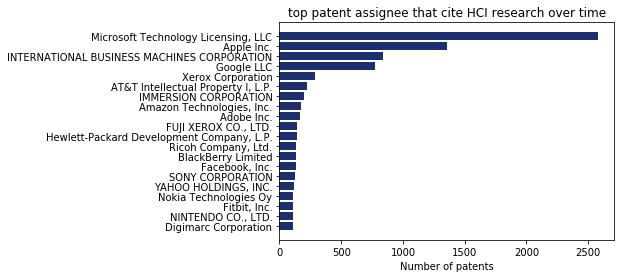

In [83]:
get_institute_patent_dist(df_patent, top_count = 20)
plt.title('top patent assignee that cite HCI research over time')

Text(0.5, 1.0, 'top patent assignee that cite HCI research over time, 2015-2020')

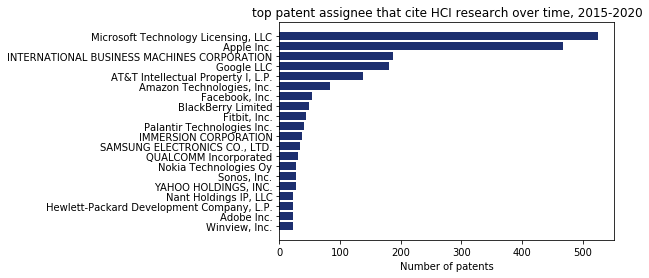

In [28]:
get_institute_patent_dist(df_patent[df_patent['year_range'] == pd.Interval(2015.0, 2020.0)])
plt.title('top patent assignee that cite HCI research over time, 2015-2020')

# top cited HCI papers by patents

In [70]:
df_citation_pair[df_citation_pair['title_x']=='WebSplitter: a unified XML framework for multi-device collaborative Web browsing']

,index,mag_id,patent,paperid,externalIds,url,title_x,abstract_x,venue,year,...,attribution_status,assignee_id,assignee_name_first,assignee_name_last,organization,aff_paperid,aff_authorids,aff_affiliations,patent_year,Is_self_cite
9355,10994,1988816896,10075473,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,1.0,3142020f-6c0b-46b7-8714-16d76aa75be7,NaN,NaN,BlackBerry Limited,1.988817e+09,"['1935012324', '1972168839', '2128661168']","[IBM Thomas J. Watson Research Center, 30 Saw ...",2018,False
9356,10995,1988816896,10104425,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,1.0,d9bbdf46-2bb6-4f71-a328-30582bd2bfad,NaN,NaN,"Virginia Innovation Sciences, Inc",1.988817e+09,"['1935012324', '1972168839', '2128661168']","[IBM Thomas J. Watson Research Center, 30 Saw ...",2018,False
9357,10996,1988816896,10136179,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,1.0,d9bbdf46-2bb6-4f71-a328-30582bd2bfad,NaN,NaN,"Virginia Innovation Sciences, Inc",1.988817e+09,"['1935012324', '1972168839', '2128661168']","[IBM Thomas J. Watson Research Center, 30 Saw ...",2018,False
9358,10997,1988816896,10149239,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,NaN,NaN,NaN,NaN,NaN,1.988817e+09,"['1935012324', '1972168839', '2128661168']","[IBM Thomas J. Watson Research Center, 30 Saw ...",,False
9359,10998,1988816896,10320857,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,NaN,NaN,NaN,NaN,NaN,1.988817e+09,"['1935012324', '1972168839', '2128661168']","[IBM Thomas J. Watson Research Center, 30 Saw ...",,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,11177,1988816896,9894174,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,NaN,NaN,NaN,NaN,NaN,1.988817e+09,"['1935012324', '1972168839', '2128661168']","[IBM Thomas J. Watson Research Center, 30 Saw ...",,False
9539,11178,1988816896,9912983,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,NaN,NaN,NaN,NaN,NaN,1.988817e+09,"['1935012324', '1972168839', '2128661168']","[IBM Thomas J. Watson Research Center, 30 Saw ...",,False
9540,11179,1988816896,9922348,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,NaN,NaN,NaN,NaN,NaN,1.988817e+09,"['1935012324', '1972168839', '2128661168']","[IBM Thomas J. Watson Research Center, 30 Saw ...",,False
9541,11180,1988816896,9942798,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP'

In [72]:
df_citation_pair['year_range'] = pd.cut(df_citation_pair.patent_year, [1970,1980,1990,2000,2005, 2010, 2015, 2020], include_lowest=True)

TypeError: '<' not supported between instances of 'int' and 'str'

In [27]:
set(df_citation_pair['year_range'])

{Interval(1980.0, 1990.0, closed='right'),
 Interval(1990.0, 2000.0, closed='right'),
 Interval(2000.0, 2005.0, closed='right'),
 Interval(2005.0, 2010.0, closed='right'),
 Interval(2010.0, 2015.0, closed='right'),
 Interval(2015.0, 2020.0, closed='right')}

In [31]:
df_citation_pair.columns

Index(['index', 'mag_id', 'patent', 'reftype', 'confscore', 'magid', 'uspto',
       'wherefound', 'doi', 'pmid', 'diff_month', 'selfciteconf_avg',
       'selfciteconf_avgno0', 'selfciteconf_max', 'paperid', 'externalIds',
       'url', 'title_x', 'abstract_x', 'venue', 'year', 'referenceCount',
       'citationCount', 'influentialCitationCount', 'isOpenAccess',
       'fieldsOfStudy', 's2FieldsOfStudy', 'publicationTypes',
       'publicationDate', 'journal', 'authors', 'patent_id', 'country', 'date',
       'abstract_y', 'title_y', 'kind', 'num_claims', 'withdrawn',
       'inventor_id', 'inventor_name_first', 'inventor_name_last', 'male_flag',
       'attribution_status', 'assignee_id', 'assignee_name_first',
       'assignee_name_last', 'organization', 'aff_paperid', 'aff_authorids',
       'aff_affiliations', 'patent_year'],
      dtype='object')

In [33]:
# overall
top = 10
for venue in set(df_citation_pair['venue']):
    df_temp = df_citation_pair[df_citation_pair['venue']==venue]
    df_top = df_temp.groupby(['title_x']).aggregate('count').reset_index().sort_values(by='patent', ascending=False).reset_index().iloc[0:top][['title_x','mag_id']]
    print ('*************')
    print ('top papers cited by patents ' + venue)
    for index, row in df_top.iterrows():
        print (row['title_x']+ ' ' +str(row['mag_id'])+ ' ' + str(paper_year_dict[row['title_x']]))
        #print ('patent citation ' + str(row['paperid_x']))

*************
top papers cited by patents UBI
Validated caloric expenditure estimation using a single body-worn sensor 113 2009
InfoScope : Link from Real World to Digital Information Space 74 2001
Self-Mapping in 802.11 Location Systems 63 2005
The NearMe Wireless Proximity Server 62 2004
Predestination: Inferring Destinations from Partial Trajectories 51 2006
The Everywhere Displays Projector: A Device to Create Ubiquitous Graphical Interfaces 46 2001
A Probabilistic Room Location Service for Wireless Networked Environments 45 2001
Smart-Its Friends: A Technique for Users to Easily Establish Connections between Smart Artefacts 41 2001
UbiTable: Impromptu Face-to-Face Collaboration on Horizontal Interactive Surfaces 40 2003
GeoNotes: Social and Navigational Aspects of Location-Based Information Systems 40 2001
*************
top papers cited by patents CSCW
WebSplitter: a unified XML framework for multi-device collaborative Web browsing 163 2000
GroupLens: an open architecture for coll

In [180]:
# over time
top = 10
for venue in set(df_citation_pair['venue']):
    print ('|||||')
    for period in [pd.Interval(1980.0, 1990.0),pd.Interval(1990.0, 2000.0),pd.Interval(2000.0, 2005.0),pd.Interval(2005.0, 2010.0),pd.Interval(2010.0, 2015.0),pd.Interval(2015.0, 2020.0)]:
        df_temp = df_citation_pair[df_citation_pair['venue']==venue]
        df_temp = df_temp[df_temp['year_range']==period]
        df_top = df_temp.groupby(['title_x']).aggregate('count').reset_index().sort_values(by='patent', ascending=False).reset_index().iloc[0:top][['title_x','paperid_x']]
        print ('*************')
        print ('top papers cited by patents ' + str(period) + '' + venue)
        for index, row in df_top.iterrows():
            print (row['title_x']+ ' ' +str(row['paperid_x'])+ ' ' + str(paper_year_dict[row['title_x']]))
            

|||||
*************
top papers cited by patents (1980.0, 1990.0]CHI
Notecards in a nutshell 1 1986
*************
top papers cited by patents (1990.0, 2000.0]CHI
IMPACT: an interactive natural-motion-picture dedicated multimedia authoring system 31 1991
Generalized fisheye views 22 1986
Notecards in a nutshell 18 1986
The perspective wall: detail and context smoothly integrated 18 1991
A magnifier tool for video data 17 1992
A “pile” metaphor for supporting casual organization of information 15 1992
The information visualizer, an information workspace 11 1991
The pantograph: a large workspace haptic device for multimodal human computer interaction 11 1994
PICTIVE—an exploration in participatory design 11 1991
Iterative design of an interface for easy 3-D direct manipulation 10 1992
*************
top papers cited by patents (2000.0, 2005.0]CHI
Tangible bits: towards seamless interfaces between people, bits and atoms 30 1997
The pantograph: a large workspace haptic device for multimodal h

*************
top papers cited by patents (2005.0, 2010.0]UIST
The world through the computer: computer augmented interaction with real world environments 71 1995
HoloWall: designing a finger, hand, body, and object sensitive wall 45 1997
DiamondTouch: a multi-user touch technology 39 2001
Pick-and-drop: a direct manipulation technique for multiple computer environments 36 1997
Supporting cooperative and personal surfing with a desktop assistant 34 1997
Multi-finger and whole hand gestural interaction techniques for multi-user tabletop displays 34 2003
Moving markup: repositioning freeform annotations 32 2002
Design and technology for Collaborage: collaborative collages of information on physical walls 30 1999
Sensing techniques for mobile interaction 30 2000
Connectables: dynamic coupling of displays for the flexible creation of shared workspaces 30 2001
*************
top papers cited by patents (2010.0, 2015.0]UIST
Sensing techniques for mobile interaction 152 2000
HoloWall: designin

In [195]:
def plot_patent_citation(title):
    plt.hist(df_citation_pair[df_citation_pair['title_x']==title]['patent_year'])
    plt.ylabel('patent citation')
    plt.xlabel('year')
    plt.title(title + ', '+ str(paper_year_dict[title]))

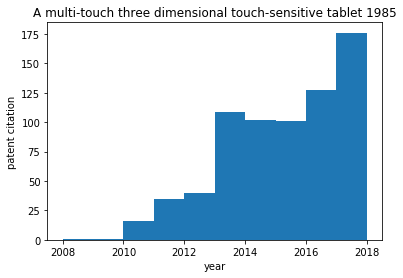

In [194]:
plot_patent_citation( 'A multi-touch three dimensional touch-sensitive tablet')

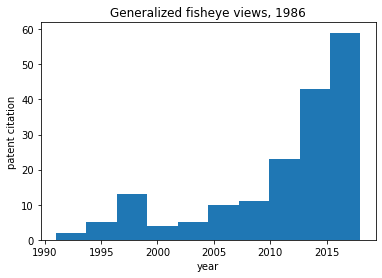

In [197]:
plot_patent_citation( 'Generalized fisheye views')

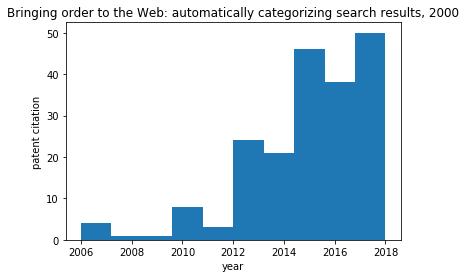

In [196]:
plot_patent_citation( 'Bringing order to the Web: automatically categorizing search results')

In [25]:
df_citation_pair

,paperid_x,patent,mag_id,paperid_y,externalIds,url,title_x,abstract_x,venue,year,...,abstract_y,title_y,kind,num_claims,withdrawn,organization,aff_affiliations,aff_authorids,aff_paperid,patent_year
0,2134161165,10001804,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A force-feedback device comprising a first mem...,Force-feedback device and method,B2,11,0,Force Dimension Sarl,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2018
4,2134161165,6024576,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A mechanical interface for providing high ban...,"Hemispherical, high bandwidth mechanical inter...",A,54,0,IMMERSION CORPORATION,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2000
9,2134161165,6028593,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A method and apparatus for providing force fe...,Method and apparatus for providing simulated p...,A,71,0,IMMERSION CORPORATION,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2000
11,2134161165,6057828,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A method and apparatus for providing force se...,Method and apparatus for providing force sensa...,A,71,0,IMMERSION CORPORATION,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2000
13,2134161165,6078308,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A method and apparatus for providing a click ...,Graphical click surfaces for force feedback ap...,A,43,0,IMMERSION CORPORATION,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116913,2064094676,9733881,2064094676,024208d85b0c92431ac8974dde69e5dcebe0d5b1,"{'MAG': '2064094676', 'DBLP': 'conf/uist/Lindl...",https://www.semanticscholar.org/paper/024208d8...,Tracs: transparency-control for see-through di...,"We present Tracs, a dual-sided see-through dis...",UIST,2014.0,...,An example facility described herein includes ...,Managing digital object viewability for a tran...,B2,20,0,INTERNATIONAL BUSINESS MACHINES CORPORATION,"['Keio University, Yokohama City, Kanagawa, Ja...","['2118079945', '2155099130', '2214760251', '22...",2064094676,2017
116914,1996931344,9740923,1996931344,fa0604c38c136ad61e60be551ee6d432bec335a2,"{'MAG': '1996931344', 'DBLP': 'conf/uist/Colac...",https://www.semanticscholar.org/paper/fa0604c3...,"Mime: compact, low power 3D gesture sensing fo...","We present Mime, a compact, low-power 3D senso...",UIST,2013.0,...,"An aspect provides a method, including: captur...",Image gestures for edge input,B2,18,0,Lenovo (Singapore) Pte. Ltd.,"['Massachusetts Institute of Technology, Cambr...","['1800868064', '1982348546', '2042299866', '20...",1996931344,2017
116916,1988798713,9740938,19887

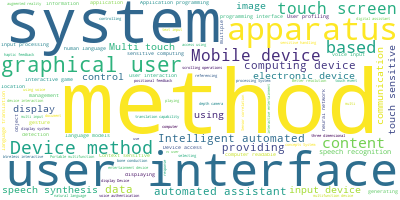

In [33]:
# abstract, patent not cited
df_citation_pair_temp = df_citation_pair[df_citation_pair['year_range']==pd.Interval(2015.0, 2020.0)]
df_temp = pd.DataFrame(df_citation_pair_temp['title_y']).dropna()
long_string = ','.join(list(df_temp['title_y'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

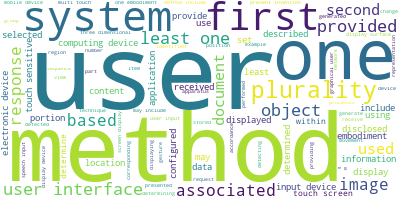

In [155]:
# abstract, patent not cited
df_temp = pd.DataFrame(df_citation_pair['abstract_y']).dropna()
long_string = ','.join(list(df_temp['abstract_y'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# get non-researcher inventor

In [104]:
df['authors'].iloc[0].replace("'", '"').replace("None", '""')

'{"offset": 0, "data": [{"authorId": "1752847", "url": "https://www.semanticscholar.org/author/1752847", "name": "K. Truong", "affiliations": [], "homepage": "", "paperCount": 155, "citationCount": 4951}, {"authorId": "1701358", "url": "https://www.semanticscholar.org/author/1701358", "name": "Shwetak N. Patel", "affiliations": [], "homepage": "", "paperCount": 241, "citationCount": 10115}, {"authorId": "2585396", "url": "https://www.semanticscholar.org/author/2585396", "name": "J. Summet", "affiliations": [], "homepage": "", "paperCount": 33, "citationCount": 974}, {"authorId": "9267108", "url": "https://www.semanticscholar.org/author/9267108", "name": "G. Abowd", "affiliations": [], "homepage": "", "paperCount": 482, "citationCount": 38493}]}'

In [110]:
### get the last names of paper authors
for unit in json.loads(df['authors'].iloc[0].replace("'", '"').replace("None", '""'))['data']:
    print (unit['name'].split(' ')[-1])

Truong
Patel
Summet
Abowd


In [126]:
print ('inventors')
print (len(set(list(df['inventor_name_last'].dropna()))))

inventors
4366


In [ ]:
paper_author_last_name = []
for i in range(len(df)):
    try:
        for unit in json.loads(df['authors'].iloc[i].replace("'", '"').replace("None", '""'))['data']:

                paper_author_last_name.append(unit['name'].split(' ')[-1])    
    except:
        pass

In [128]:
collections.Counter(list(df['inventor_name_last'])).most_common()

[(nan, 28696),
 ('Weston', 1006),
 ('Wilson', 868),
 ('Westerman', 634),
 ('Kushler', 462),
 ('Hinckley', 429),
 ('Cheyer', 422),
 ('Davidson', 410),
 ('van Os', 382),
 ('Hotelling', 364),
 ('Ikeda', 314),
 ('Horvitz', 305),
 ('Yee', 285),
 ('Naik', 285),
 ('Patel', 251),
 ('Grossman', 248),
 ('Graham', 248),
 ('Pahud', 242),
 ('Rhoads', 237),
 ('Appelman', 235),
 ('Cohen', 233),
 ('Zhong', 219),
 ('Bellegarda', 217),
 ('Longe', 216),
 ('Matejka', 206),
 ('Gruber', 190),
 ('Shoemaker', 188),
 ('Chang', 185),
 ('Lemay', 184),
 ('Migos', 182),
 ('Lee', 180),
 ('Marcus', 177),
 ('Xie', 169),
 ('Hodge', 163),
 ('King', 161),
 ('Zhai', 160),
 ('Bathiche', 156),
 ('Bell', 155),
 ('Lauwers', 155),
 ('Piersol', 153),
 ('Balakrishnan', 151),
 ('Platzer', 150),
 ('Czerwinski', 150),
 ('Rosenberg', 150),
 ('Li', 146),
 ('Weeldreyer', 143),
 ('Christie', 142),
 ('Drucker', 141),
 ('SADDLER', 141),
 ('Jones', 140),
 ('Ohta', 136),
 ('Robertson', 134),
 ('Gerszberg', 134),
 ('Imes', 132),
 ('Mikkels

In [125]:
print ('paper authors')
print (len(set(paper_author_last_name)))

paper authors
6109


In [130]:
collections.Counter(list(paper_author_last_name)).most_common()

[('Buxton', 3052),
 ('Smith', 3016),
 ('Lee', 2715),
 ('Rekimoto', 2611),
 ('Hinckley', 2375),
 ('Balakrishnan', 1895),
 ('Wilson', 1708),
 ('Robertson', 1360),
 ('Harrison', 1336),
 ('Baudisch', 1325),
 ('Card', 1265),
 ('Chen', 1243),
 ('Hudson', 1214),
 ('Ishii', 1204),
 ('Rubine', 1186),
 ('Rao', 1112),
 ('Bederson', 1109),
 ('Morris', 1064),
 ('Li', 1032),
 ('Fitzmaurice', 1003),
 ('Izadi', 979),
 ('Myers', 936),
 ('Benko', 901),
 ('Kurtenbach', 843),
 ('Sinclair', 816),
 ('Furnas', 804),
 ('Zhai', 796),
 ('Fishkin', 788),
 ('Landay', 787),
 ('Mackinlay', 784),
 ('Kim', 783),
 ('Patel', 760),
 ('Shen', 741),
 ('MacKenzie', 729),
 ('Miller', 726),
 ('Shneiderman', 720),
 ('Gupta', 710),
 ('Dietz', 694),
 ('Horvitz', 681),
 ('Dumais', 668),
 ('Stone', 656),
 ('Wobbrock', 653),
 ('Newman', 643),
 ('Forlines', 634),
 ('Guimbretière', 632),
 ('Hodges', 616),
 ('Poupyrev', 612),
 ('Czerwinski', 576),
 ('Baudel', 572),
 ('Han', 563),
 ('Bier', 561),
 ('Greenberg', 557),
 ('Leigh', 535),


In [138]:
df_not_researcher = df[df['inventor_name_last'].isin(set(list(df['inventor_name_last'].dropna())).difference(set(paper_author_last_name)))]

In [139]:
df_not_researcher[df_not_researcher['selfciteconf_avgno0']==1]

,index,mag_id,patent,paperid,externalIds,url,title_x,abstract_x,venue,year,...,male_flag,attribution_status,assignee_id,assignee_name_first,assignee_name_last,organization,aff_paperid,aff_authorids,aff_affiliations,patent_year


# self-citation analysis

In [26]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,68611,68612,68613,68614,68615,68616,68617,68618,68619,68620
index,0,1,2,3,4,5,6,7,8,9,...,73942,73943,73944,73945,73946,73947,73948,73949,73951,73952
mag_id,9453182,9453182,9453182,9453182,9453182,9453182,9453182,9453182,9453182,9453182,...,3022307797,3022307797,3022307797,3022307797,3022307797,3022307797,3031080112,3032493835,3102912458,3103005787
patent,10389475,10531038,10592687,10602054,11017680,11156901,2329456,2602740,8184175,9081413,...,10943578,11048329,11098951,11169610,11189140,11204644,10956130,10929110,11157707,11205009
paperid,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8,63fc6df0aa899082e36a504c8a532d5689596df8,...,4150895f17e4239b84b971e497378f4a7529a979,4150895f17e4239b84b971e497378f4a7529a979,4150895f17e4239b84b971e497378f4a7529a979,4150895f17e4239b84b971e497378f4a7529a979,4150895f17e4239b84b971e497378f4a7529a979,4150895f17e4239b84b971e497378f4a7529a979,e8749c8558e5d66a48308921f623d7e1ff1a8374,20e8b2dc334486a9da3c6f70384261b2023159b8,9849cc224b40b7753a7721eebd02f211640f9fae,e284043d45732e0b9c24344f27c00ae04f56ae9f
externalIds,"{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...","{'MAG': '9453182', 'DBLP': 'conf/huc/TruongPSA...",...,"{'MAG': '3022307797', 'DBLP': 'conf/chi/Obrist...","{'MAG': '3022307797', 'DBLP': 'conf/chi/Obrist...","{'MAG': '3022307797', 'DBLP': 'conf/chi/Obrist...","{'MAG': '3022307797', 'DBLP': 'conf/chi/Obrist...","{'MAG': '3022307797', 'DBLP': 'conf/chi/Obrist...","{'MAG': '3022307797', 'DBLP': 'conf/chi/Obrist...","{'MAG': '3031080112', 'DBLP': 'conf/chi/Maayan...","{'MAG': '3032493835', 'DBLP': 'conf/chi/WuJLM2...","{'MAG': '2767057583', 'ArXiv': '1801.02668', '...","{'ArXiv': '1803.01166', 'DBLP': 'conf/chi/Park..."
url,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...,https://www.semanticscholar.org/paper/63fc6df0...,...,https://www.semanticscholar.org/paper/4150895f...,https://www.semanticscholar.org/paper/4150895f...,https://www.semanticscholar.org/paper/4150895f...,https://www.semanticscholar.org/paper/4150895f...,https://www.semanticscholar.org/paper/4150895f...,https://www.semanticscholar.org/paper/4150895f...,https://www.semanticscholar.org/paper/e8749c85...,https://www.semanticscholar.org/paper/20e8b2dc...,https://www.semanticscholar.org/paper/9849cc22...,https://www.semanticscholar.org/paper/e284043d...
title_x,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...,Preventing Camera Recording by Designing a Cap...,...,Talking about tactile experie

In [142]:
df[df['selfciteconf_avg']==0][['magid','patent']].drop_duplicates().to_csv('non_self_cite_patent_mag.tsv',index=False)

In [37]:
df = df[df['patent_year']!='']
df['Is_self_cite'] = df['selfciteconf_avg']>0

C:\Users\hanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
#df[df['selfciteconf_avg']>1].to_csv('self_cite.csv')

Text(0, 0.5, 'patent-paper time lag (months)')

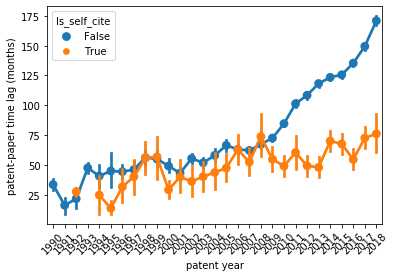

In [40]:
# self cite diffuses faster
sns.pointplot(x='patent_year', y='diff_month', hue = 'Is_self_cite', data=df)
plt.xticks(rotation=45)
plt.xlabel('patent year')
plt.ylabel('patent-paper time lag (months)')


In [60]:
set(df['reftype'])

{'app', 'exm'}

In [62]:
## only one examiner added reference????
df[df['reftype']=='exm']

,level_0,index,mag_id,patent,reftype,confscore,magid,uspto,wherefound,doi,...,attribution_status,assignee_id,assignee_name_first,assignee_name_last,organization,aff_paperid,aff_authorids,aff_affiliations,patent_year,Is_self_cite
1732,2277,2286,1967451823,9760195,exm,10,1967451823,1,frontonly,10.1145/1165385.317461,...,1,235e9418-ffba-4a1b-a9ed-464c394ce170,NaN,NaN,Apple Inc.,1967451823,"['2326945342', '2343477906', '2498202625']","['Computer Systems Research Institute, Univers...",2017,False


Text(0, 0.5, 'patent-paper time lag (months)')

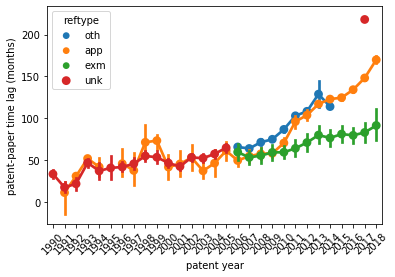

In [41]:
sns.pointplot(x='patent_year', y='diff_month', hue = 'reftype', data=df)
plt.xticks(rotation=45)
plt.xlabel('patent year')
plt.ylabel('patent-paper time lag (months)')

In [ ]:
# self-cite percentage over patent years

In [42]:
print ('percentage of self cite in HCI patents')
print (len(df[df['Is_self_cite']==True])/len(df))

percentage of self cite in HCI patents
0.04533500313087038


Text(0, 0.5, 'percentage')

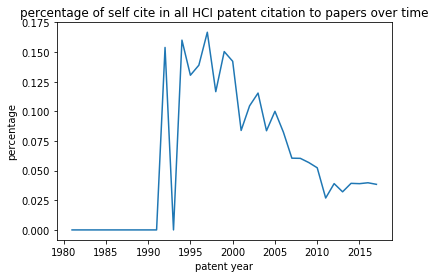

In [43]:
# self-cite percentage over paper years
percentage = []
Year = []
for year in set(df['year']):
    Year.append(year)
    df_temp = df[df['patent_year']==year]
    try:
        percentage.append(len(df_temp[df_temp['Is_self_cite']==True])/len(df_temp))    
    except:
        percentage.append(0)
        

plt.plot(Year, percentage)
plt.title('percentage of self cite in all HCI patent citation to papers over time')
plt.xlabel('patent year')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

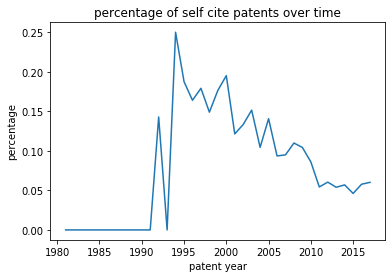

In [44]:
# self-cite unique patent percentage over paper years
percentage = []
Year = []
Self_cite_patent_num = []
Patent_num_total = []
for year in set(df['year']):
    Year.append(year)
    df_temp = df[df['patent_year']==year]
    try:
        percentage.append(len(set(df_temp[df_temp['Is_self_cite']==True]['patent_id']))/len(set(df_temp['patent_id']))) 
        Self_cite_patent_num.append(len(set(df_temp[df_temp['Is_self_cite']==True]['patent_id'])))
        Patent_num_total.append(len(set(df_temp['patent_id'])))
    except:
        percentage.append(0)
        Self_cite_patent_num.append(0)
        Patent_num_total.append(len(set(df_temp['patent_id'])))
        

plt.plot(Year, percentage)
plt.title('percentage of self cite patents over time')
plt.xlabel('patent year')
plt.ylabel('percentage')

Text(0, 0.5, 'patent #')

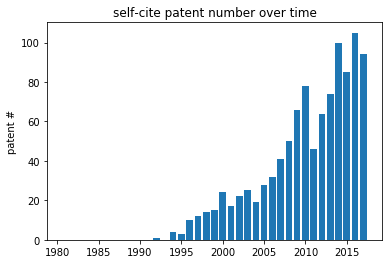

In [45]:


#plt.bar(Year, Patent_num_total, label='Total')
plt.bar(Year, Self_cite_patent_num,  label='Self cite patent')
plt.title('self-cite patent number over time')
plt.ylabel('patent #')

Text(0, 0.5, 'percentage')

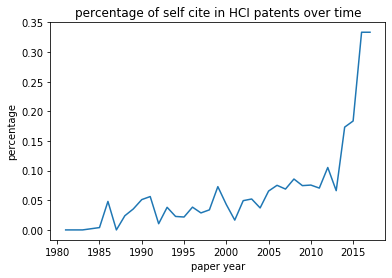

In [46]:
# self-cite percentage over paper years, may be influenced by censoring
percentage = []
Year = []
for year in set(df['year']):
    Year.append(year)
    df_temp = df[df['year']==year]
    try:
        percentage.append(len(df_temp[df_temp['Is_self_cite']==True])/len(df_temp))    
    except:
        percentage.append(0)
        

plt.plot(Year, percentage)
plt.title('percentage of self cite in HCI patents over time')
plt.xlabel('paper year')
plt.ylabel('percentage')

# explore 'same institute'

In [159]:
from difflib import SequenceMatcher

def similar(a, b):
    return fuzz.partial_ratio(str(a).lower(), str(b).lower())

In [160]:
def highest_similarity_score(List,s):
    similarity = []
    for s0 in List:
        similarity.append(similar(s0,s))
    return np.max(similarity)

In [161]:
highest_similarity_score(df['aff_affiliations'].iloc[10],df['organization'].iloc[10])

63

In [162]:
org_match_score = []
for i in range(len(df)):
    try:
        org_match_score.append(highest_similarity_score(df['aff_affiliations'].iloc[i],df['organization'].iloc[i]))
    except:
        org_match_score.append(-1)

In [170]:
df['entity_match_score'] = org_match_score
df['Is_same_institute'] = (df['entity_match_score'] >= 70)

(array([2.018e+03, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 9.000e+00,
        2.400e+01, 4.100e+01, 1.030e+02, 8.800e+01, 5.140e+02, 3.400e+02,
        4.730e+02, 9.460e+02, 1.564e+03, 2.542e+03, 2.457e+03, 1.822e+03,
        2.229e+03, 1.248e+03, 4.262e+03, 1.673e+03, 1.161e+03, 6.360e+02,
        2.290e+02, 1.618e+03, 2.540e+02, 4.320e+02, 2.550e+02, 8.000e+01,
        5.830e+02, 8.700e+01, 4.300e+01, 1.370e+02, 3.900e+01, 8.600e+01,
        6.000e+00, 2.900e+01, 4.000e+01, 1.400e+01, 9.000e+00, 2.500e+01,
        1.900e+01, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 7.600e+01]),
 array([ -1.  ,   1.02,   3.04,   5.06,   7.08,   9.1 ,  11.12,  13.14,
         15.16,  17.18,  19.2 ,  21.22,  23.24,  25.26,  27.28,  29.3 ,
         31.32,  33.34,  35.36,  37.38,  39.4 ,  41.42,  43.44,  45.46,
         47.48,  49.5 ,  51.52,  53.54,  55.56,  57.58,  59.6 ,  61.62,
         63.64,  65.66,  67.68,  69.7 ,  71.72,  73.74,  75.76,  77.78,
         79.8 , 

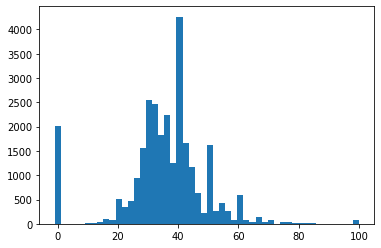

In [171]:
plt.hist(org_match_score, bins=50)

In [172]:
df[df['Is_same_institute']==True]

,level_0,index,mag_id,patent,reftype,confscore,magid,uspto,wherefound,doi,...,assignee_name_first,assignee_name_last,organization,aff_paperid,aff_authorids,aff_affiliations,patent_year,Is_self_cite,entity_match_score,Is_same_institute
246,394,401,1559440445,7370200,app,10,1559440445,1,frontonly,10.1007/978-3-540-39653-6_9,...,NaN,NaN,"Hewlett-Packard Development Company, L.P.",1559440445,"['2064151893', '2190552850']","[hewlett packard labs, hewlett packard labs]",2008,True,75,True
412,775,784,1598464535,8933841,app,10,1598464535,1,frontonly,10.1007/978-3-540-30119-6_6,...,NaN,NaN,THE GOVERNING COUNCIL OF THE UNIVERSITY OF TOR...,1598464535,"['141796421', '141796421', '2116724686', '2116...","[Intel Research, Seattle, University of Washin...",2015,False,76,True
418,781,790,1598464535,9763035,app,10,1598464535,1,frontonly,10.1007/978-3-540-30119-6_6,...,NaN,NaN,THE GOVERNING COUNCIL OF THE UNIVERSITY OF TOR...,1598464535,"['141796421', '141796421', '2116724686', '2116...","[Intel Research, Seattle, University of Washin...",2017,False,76,True
475,977,986,1811908717,8060227,app,10,1811908717,1,frontonly,10.1007/11853565_28,...,NaN,NaN,Palo Alto Research Center Incorporated,1811908717,"['2138417982', '2155809186', '2250908404', '29...","[Palo Alto Research Center Palo Alto CA, Samsu...",2011,False,76,True
476,978,987,1811908717,8340796,app,10,1811908717,1,frontonly,10.1007/11853565_28,...,NaN,NaN,Palo Alto Research Center Incorporated,1811908717,"['2138417982', '2155809186', '2250908404', '29...","[Palo Alto Research Center Palo Alto CA, Samsu...",2012,False,76,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27037,29339,29357,2165865052,8199107,app,10,2165865052,1,frontonly,10.1145/642611.642645,...,NaN,NaN,University of Waterloo,2165865052,"['2112488153', '2115951828', '2130130894']","[(University of Toronto, Canada, (University o...",2012,False,82,True
27239,29546,29564,2167670020,7010751,app,10,2167670020,1,both,10.1145/302979.303064,...,NaN,NaN,"UNIVERSITY OF MARYLAND, COLLEGE PARK",2167670020,"['2046653803', '2503118683', '935383222']","[Computer Science Dept./UMIACS, Human-Computer...",2006,False,100,True
27775,30102,30120,2169709590,9465494,app,10,2169709590,1,frontonly,10.1145/1753326.1753394,...,NaN,NaN,CARNEGIE MELLON UNIVERSITY,2169709590,"['2105140892', '2123491528', '2168727892']","[Microsoft Research, redmond, WA, USA#TAB#, C...",2016,True,100,True
27997,30331,30349,2171939706,7937752,app,7,2171939706,1,frontonly,10.1145/587078.587114,...,NaN,NaN,Palo Alto Research Center Incorporated,2171939706,"['2138417982', '2150211346', '2166870691', '21...","[Palo Alto Research Center Palo Alto CA, Palo ...",2011,True,76,True


In [144]:
from fuzzywuzzy import fuzz

C:\Users\hanch\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [166]:
highest_similarity_score(['Microsoft Technology Licensing, LLC'],'Microsoft Research')

72

Text(0, 0.5, 'percentage')

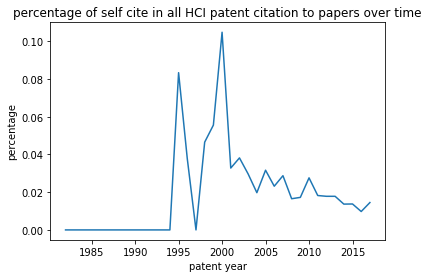

In [175]:
# same org unique patent percentage over paper years, problematic
percentage = []
Year = []
Self_cite_patent_num = []
Patent_num_total = []
for year in set(df['year']):
    Year.append(year)
    df_temp = df[df['patent_year']==year]
    try:
        percentage.append(len(set(df_temp[df_temp['Is_same_institute']==True]['patent_id']))/len(set(df_temp['patent_id']))) 
        Self_cite_patent_num.append(len(set(df_temp[df_temp['Is_same_institute']==True]['patent_id'])))
        Patent_num_total.append(len(set(df_temp['patent_id'])))
    except:
        percentage.append(0)
        Self_cite_patent_num.append(0)
        Patent_num_total.append(len(set(df_temp['patent_id'])))
        

plt.plot(Year, percentage)
plt.title('percentage of self cite in all HCI patent citation to papers over time')
plt.xlabel('patent year')
plt.ylabel('percentage')